In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load the data
data_p01_ses01 = pd.read_csv('/Users/majafriedemann/Library/CloudStorage/OneDrive-Nexus365/pgACC-TUS/data/effort_task_behaviour/p01_ses01_2024-12-02_11h29.28.822.csv')
data_p01_ses02 = pd.read_csv('/Users/majafriedemann/Library/CloudStorage/OneDrive-Nexus365/pgACC-TUS/data/effort_task_behaviour/p01_ses02_2024-12-16_10h48.37.764.csv')
data_p03_ses01 = pd.read_csv('/Users/majafriedemann/Library/CloudStorage/OneDrive-Nexus365/pgACC-TUS/data/effort_task_behaviour/p03_ses01_2024-12-05_11h40.16.701.csv')
data_p03_ses02 = pd.read_csv('/Users/majafriedemann/Library/CloudStorage/OneDrive-Nexus365/pgACC-TUS/data/effort_task_behaviour/p03_ses02_2024-12-18_10h36.22.619.csv')

In [78]:
# Add participant and session identifiers, and a stimulation condition column
data_p01_ses01['participant'] = 'p01'
data_p01_ses01['session'] = 1
data_p01_ses01['stimulation'] = True   # Ultrasound stimulation

data_p01_ses02['participant'] = 'p01'
data_p01_ses02['session'] = 2
data_p01_ses02['stimulation'] = False  # Control (no stimulation)

data_p03_ses01['participant'] = 'p03'
data_p03_ses01['session'] = 1
data_p03_ses01['stimulation'] = True   # Ultrasound stimulation

data_p03_ses02['participant'] = 'p03'
data_p03_ses02['session'] = 2
data_p03_ses02['stimulation'] = False  # Control (no stimulation)

In [79]:
# Combine all data
data = pd.concat([data_p01_ses01, data_p01_ses02, data_p03_ses01, data_p03_ses02])

In [80]:
# Check the combined data
data.head()

,expName,curec_ID,trial_schedule,session_nr,date,start_time,end_time,duration,participant,age,...,response_time,result,points,cumulative_points,effort_trace,effort_expended,effort_response_time,final_bonus_payment,session,stimulation
0,reward-effort-pgACC-TUS,R88533/RE002,A_2,1,2024-12-02_11h29.28.822,2024-12-02 11:32:12,NaN,NaN,p01,23,...,3.451036,success,95,95,"[2.336464467401566, 2.3228803716608595, 2.3092...",99.487945,1.826716,NaN,1,True
1,reward-effort-pgACC-TUS,R88533/RE002,A_2,1,2024-12-02_11h29.28.822,2024-12-02 11:32:12,NaN,NaN,p01,23,...,0.696777,success,38,133,"[2.2957121801794456, 2.2821280844387393, 2.282...",100.306716,2.119416,NaN,1,True
2,reward-effort-pgACC-TUS,R88533/RE002,A_2,1,2024-12-02_11h29.28.822,2024-12-02 11:32:12,NaN,NaN,p01,23,...,0.523030,success,119,252,"[2.974916967214785, 2.9613328714740783, 2.9749...",100.801221,1.938198,NaN,1,True
3,reward-effort-pgACC-TUS,R88533/RE002,A_2,1,2024-12-02_11h29.28.822,2024-12-02 11:32:12,NaN,NaN,p01,23,...,0.844532,success,74,326,"[3.5862012755465904, 3.5862012755465904, 3.626...",107.247970,2.024233,NaN,1,True
4,reward-effort-pgACC-TUS,R88533/RE002,A_2,1,2024-12-02_11h29.28.822,2024-12-02 11:32:12,NaN,NaN,p01,23,...,0.513623,success,71,397,"[2.893412392770544, 2.9341646799926644, 2.9069...",97.780293,2.042753,NaN,1,True


#### Participants accept more with TUS but could also be an order effect

#### Also participant 1 accidentally had different trial schedules 
(participant 3 had schedule B_2 both times, participant 1, had schedule A_2 for session 1 and then B_2 for session 2)

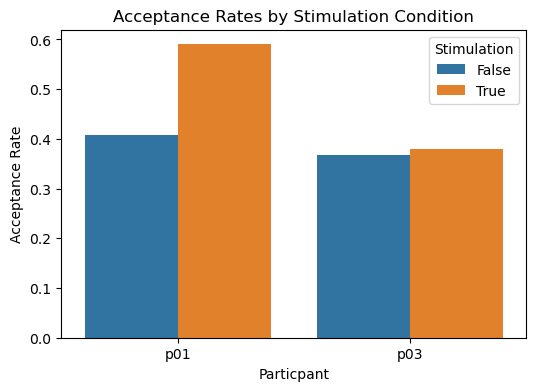

In [81]:
# Calculate percentage of 'accept' responses by session condition and participant
accept_rate_by_condition = data.groupby(['participant', 'stimulation'])['response'].apply(lambda x: (x == 'accept').mean()).reset_index()
accept_rate_by_condition.columns = ['participant', 'stimulation', 'accept_rate']

# Plot accept rates by condition
plt.figure(figsize=(6, 4))
sns.barplot(x='participant', y='accept_rate', hue='stimulation', data=accept_rate_by_condition)
plt.title('Acceptance Rates by Stimulation Condition')
plt.ylabel('Acceptance Rate')
plt.xlabel('Particpant')
plt.legend(title='Stimulation')
plt.show()

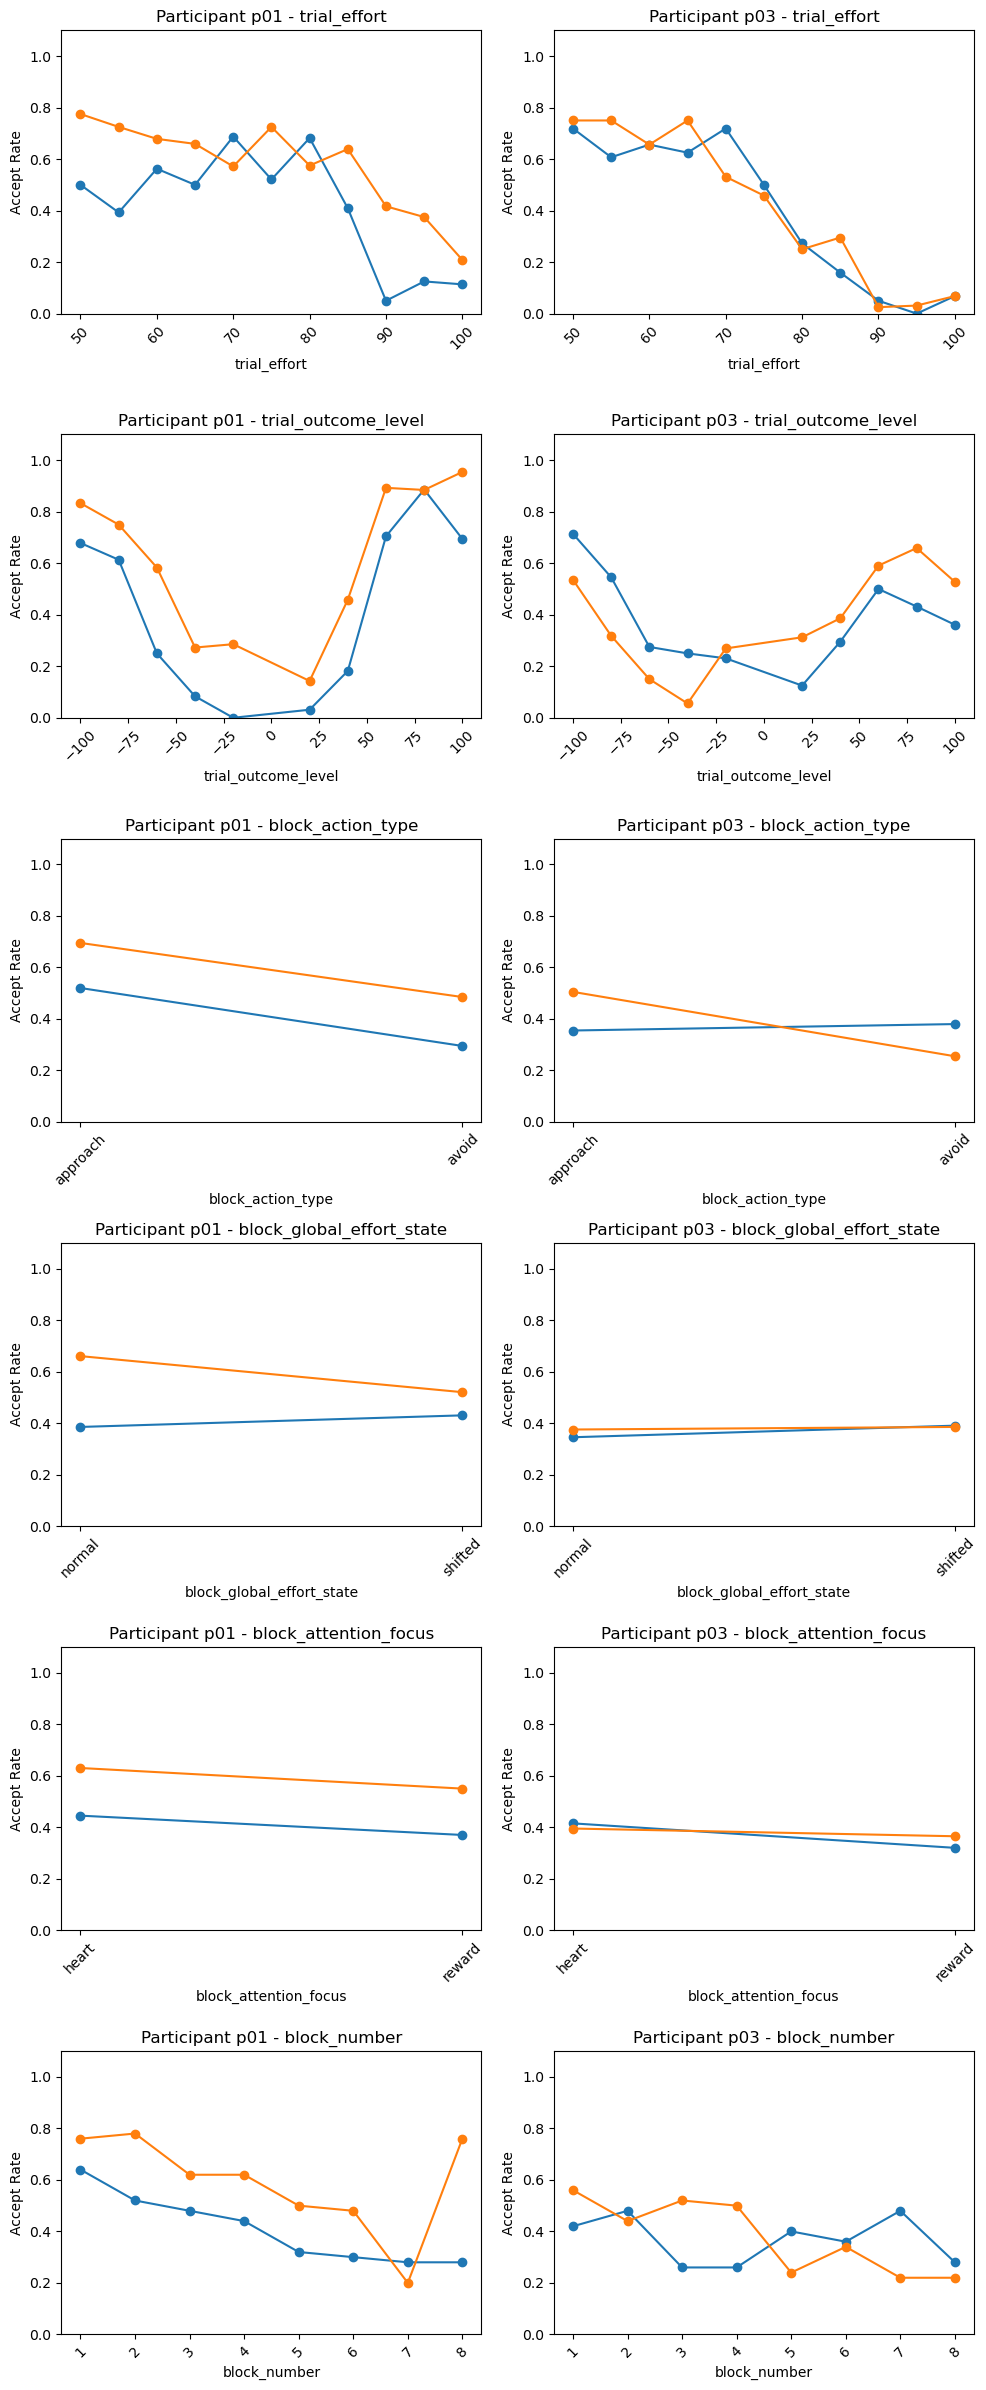

In [82]:
# Define the variables to plot
variables_to_plot = ['trial_effort', 'trial_outcome_level', 'block_action_type', 'block_global_effort_state', 'block_attention_focus', 'block_number']

# Get unique participants
unique_participants = data['participant'].unique()

# Define the number of rows and columns based on participants and variables
fig, axes = plt.subplots(len(variables_to_plot), len(unique_participants), figsize=(5 * len(unique_participants), 4 * len(variables_to_plot)))

for i, var in enumerate(variables_to_plot):
    for j, participant in enumerate(unique_participants):
        # Filter data for the participant
        participant_data = data[data['participant'] == participant]

        # Calculate the percentage of 'accept' responses for each level of the variable, split by stimulation
        participant_percent_accept_var = participant_data.groupby(['stimulation', var])['response'].apply(lambda x: (x == 'accept').mean()).reset_index()

        if participant_percent_accept_var.empty:
            # Skip if no data for this combination
            axes[i, j].set_visible(False)
            continue

        # Add line plot for stimulation=True and stimulation=False
        for stimulation_value in participant_percent_accept_var['stimulation'].unique():
            subset = participant_percent_accept_var[participant_percent_accept_var['stimulation'] == stimulation_value]
            axes[i, j].plot(
                subset[var], 
                subset['response'], 
                label=f"Stimulation={stimulation_value}", 
                marker='o'
            )

        # Adjust the subplot title and labels
        axes[i, j].set_title(f'Participant {participant} - {var}')
        axes[i, j].set_xlabel(var)
        axes[i, j].set_ylabel('Accept Rate')
        axes[i, j].set_ylim(0, 1.1)
        axes[i, j].tick_params(axis='x', rotation=45)

        # Remove redundant legends if they exist
        if axes[i, j].legend_ is not None:
            if i > 0 or j > 0:
                axes[i, j].legend_.remove()

plt.tight_layout()
plt.show()


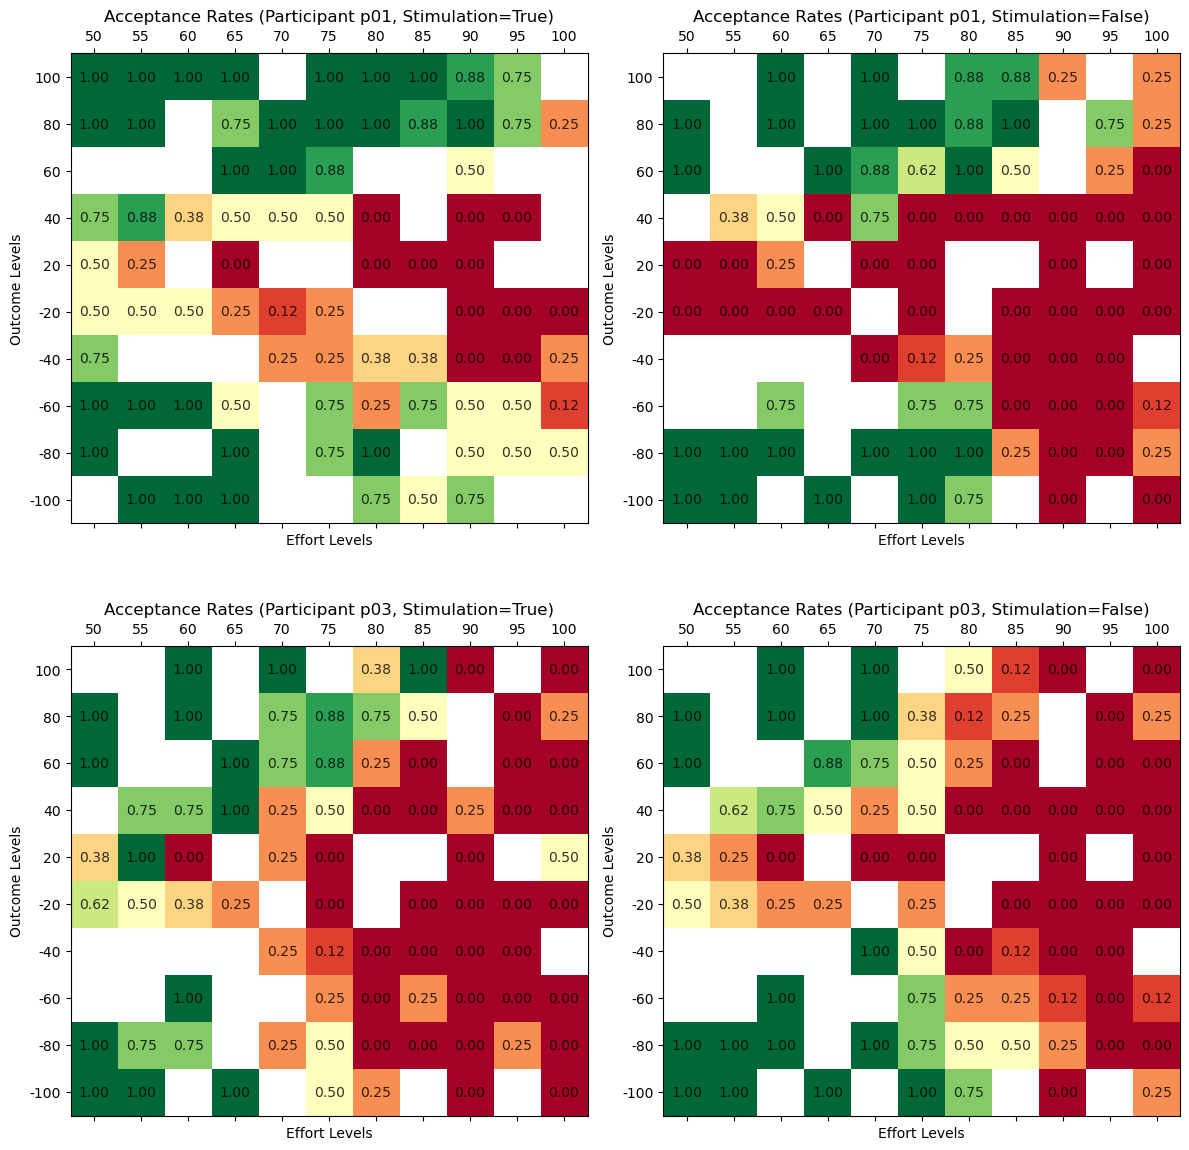

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Group by participant, trial_effort, and trial_outcome_level, then calculate the mean acceptance rate for each group
participant_acceptance_rate = data.groupby(['participant', 'stimulation', 'trial_effort', 'trial_outcome_level'])['response'].apply(lambda x: (x == 'accept').mean()).reset_index()

# Get the list of unique participants, effort levels, and outcome levels
participants = participant_acceptance_rate['participant'].unique()
effort_levels = sorted(participant_acceptance_rate['trial_effort'].unique())
outcome_levels = sorted(participant_acceptance_rate['trial_outcome_level'].unique())

# Create a figure with subplots for each participant (2 columns: stimulation=True and stimulation=False)
n_participants = len(participants)
fig, axes = plt.subplots(n_participants, 2, figsize=(12, 6 * n_participants))

for idx, participant in enumerate(participants):
    # Filter data for the current participant and stimulation=True/False
    for col, stimulation_value in enumerate([True, False]):
        participant_data = participant_acceptance_rate[(participant_acceptance_rate['participant'] == participant) & 
                                                       (participant_acceptance_rate['stimulation'] == stimulation_value)]

        # Pivot the data to create a matrix for the heatmap
        acceptance_rate_data = participant_data.pivot(index='trial_outcome_level', columns='trial_effort', values='response')

        # Handle missing data by filling with NaN
        acceptance_rate_matrix = acceptance_rate_data.reindex(index=outcome_levels, columns=effort_levels).values

        # Plot the acceptance rate heatmap
        ax = axes[idx, col] if n_participants > 1 else axes[col]
        cax = ax.matshow(acceptance_rate_matrix, interpolation='nearest', cmap='RdYlGn', vmin=0, vmax=1)


        ax.set_xticks(np.arange(len(effort_levels)))
        ax.set_yticks(np.arange(len(outcome_levels)))
        ax.set_xticklabels(np.array(effort_levels).astype(int))
        ax.set_yticklabels(np.array(outcome_levels).astype(int))
        ax.invert_yaxis()

        # Remove grid lines
        ax.grid(False)

        # Add text labels with mean acceptance rates
        for i in range(len(outcome_levels)):
            for j in range(len(effort_levels)):
                if not np.isnan(acceptance_rate_matrix[i, j]):
                    ax.text(j, i, f'{acceptance_rate_matrix[i, j]:.2f}', ha='center', va='center', color='black', alpha=0.8)

        # Add title and labels
        ax.set_xlabel('Effort Levels')
        ax.set_ylabel('Outcome Levels')
        ax.set_title(f'Acceptance Rates (Participant {participant}, Stimulation={stimulation_value})')

plt.tight_layout()
plt.show()


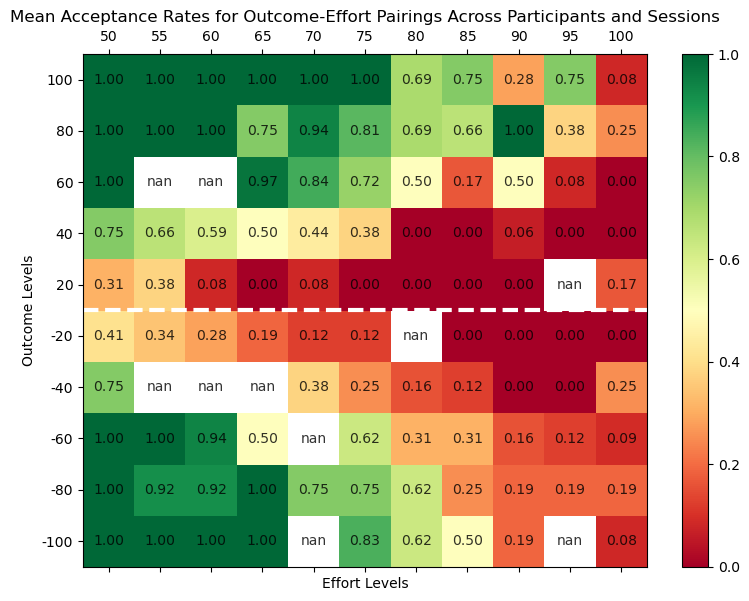

In [84]:
# Group by participant, trial_effort, and trial_outcome_level, then calculate the mean acceptance rate for each group
participant_acceptance_rate = data.groupby(['participant', 'session', 'trial_effort', 'trial_outcome_level'])['response'].apply(lambda x: (x == 'accept').mean()).reset_index()

# Calculate the mean acceptance rate across all participants for each combination of trial_effort and trial_outcome_level
mean_acceptance_rate = participant_acceptance_rate.groupby(['trial_effort', 'trial_outcome_level'])['response'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = mean_acceptance_rate.pivot(index='trial_outcome_level', columns='trial_effort', values='response').values

# Get the list of unique effort and outcome levels
effort_levels = sorted(participant_acceptance_rate['trial_effort'].unique())
outcome_levels = sorted(participant_acceptance_rate['trial_outcome_level'].unique())

fig, ax = plt.subplots(figsize=(8, 6))

# Acceptance rate heatmap
cax = ax.matshow(heatmap_data, interpolation='nearest', cmap='RdYlGn')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(effort_levels)))
ax.set_yticks(np.arange(len(outcome_levels)))
ax.set_xticklabels(np.array(effort_levels).astype(int))
ax.set_yticklabels(np.array(outcome_levels).astype(int))
ax.invert_yaxis()

# Remove grid lines
ax.grid(False)

# Add text labels with mean acceptance rates
for i in range(len(outcome_levels)):
    for j in range(len(effort_levels)):
        ax.text(j, i, f'{heatmap_data[i, j]:.2f}', ha='center', va='center', color='black', alpha=0.8)

lowest_reward_index = np.where(np.array(outcome_levels) == 20)[0][0]
ax.axhline(lowest_reward_index - 0.5, color='white', linestyle='--', linewidth=3)

ax.set_xlabel('Effort Levels')
ax.set_ylabel('Outcome Levels')
ax.set_title('Mean Acceptance Rates for Outcome-Effort Pairings Across Participants and Sessions')

plt.tight_layout()
plt.show()


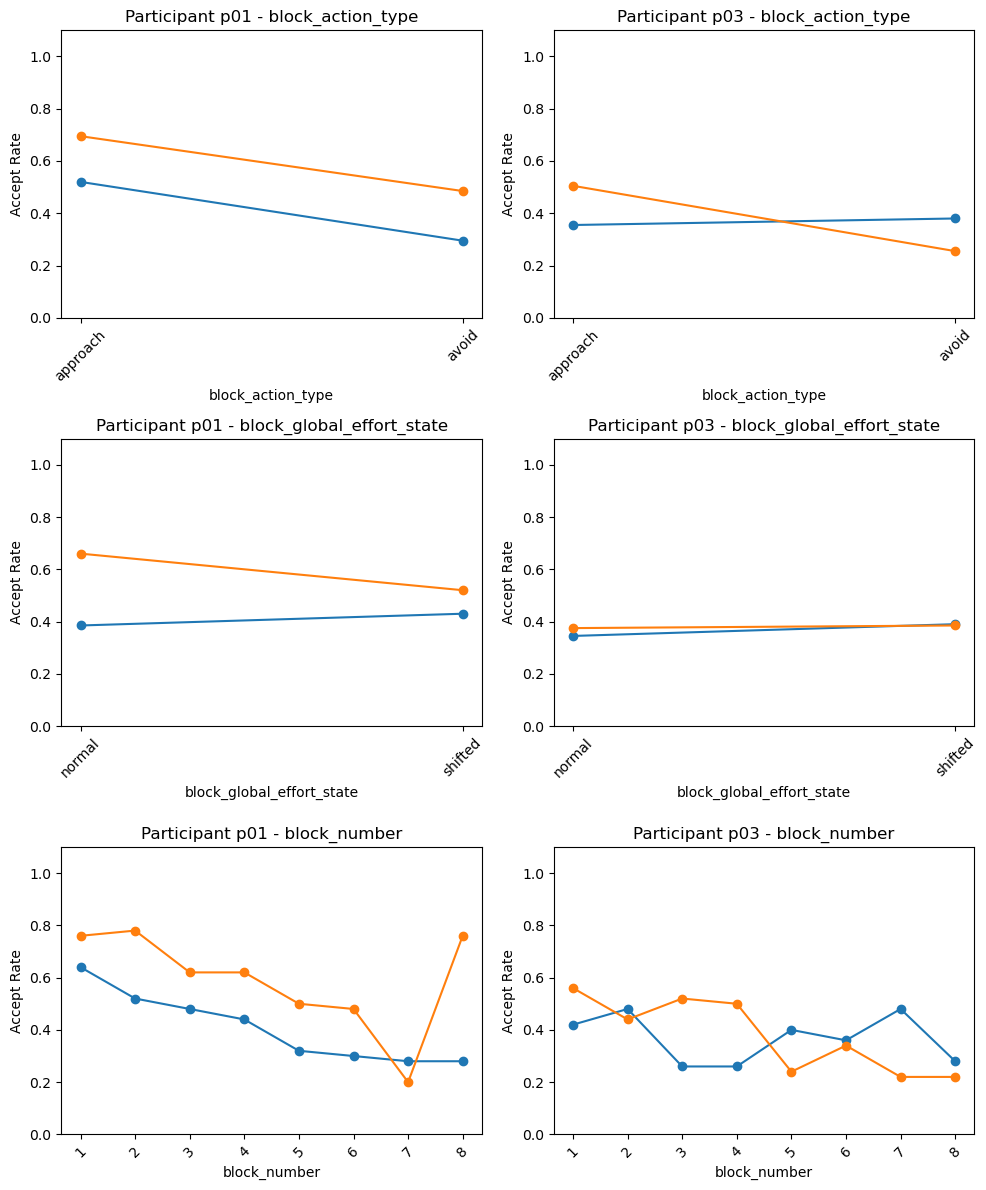

In [85]:
variables_to_plot = ['block_action_type', 'block_global_effort_state', 'block_number']

# Get unique participants
unique_participants = data['participant'].unique()

# Define the number of rows and columns based on participants and variables
fig, axes = plt.subplots(len(variables_to_plot), len(unique_participants), figsize=(5 * len(unique_participants), 4 * len(variables_to_plot)))

for i, var in enumerate(variables_to_plot):
    for j, participant in enumerate(unique_participants):
        # Filter data for the participant
        participant_data = data[data['participant'] == participant]

        # Calculate the percentage of 'accept' responses for each level of the variable, split by stimulation
        participant_percent_accept_var = participant_data.groupby(['stimulation', var])['response'].apply(lambda x: (x == 'accept').mean()).reset_index()

        if participant_percent_accept_var.empty:
            # Skip if no data for this combination
            axes[i, j].set_visible(False)
            continue

        # Add line plot for stimulation=True and stimulation=False
        for stimulation_value in participant_percent_accept_var['stimulation'].unique():
            subset = participant_percent_accept_var[participant_percent_accept_var['stimulation'] == stimulation_value]
            axes[i, j].plot(
                subset[var], 
                subset['response'], 
                label=f"Stimulation={stimulation_value}", 
                marker='o'
            )

        # Adjust the subplot title and labels
        axes[i, j].set_title(f'Participant {participant} - {var}')
        axes[i, j].set_xlabel(var)
        axes[i, j].set_ylabel('Accept Rate')
        axes[i, j].set_ylim(0, 1.1)
        axes[i, j].tick_params(axis='x', rotation=45)

        # Remove redundant legends if they exist
        if axes[i, j].legend_ is not None:
            if i > 0 or j > 0:
                axes[i, j].legend_.remove()

plt.tight_layout()
plt.show()